In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [12]:
digits = load_digits()

In [13]:
data = pd.DataFrame(digits.data)

In [14]:
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


## Standarization of data sets

In [9]:
# bringing data in same scale - Mean will become 0 and variance = 1 because PCA is very sensitive towards variance

In [15]:
from sklearn.preprocessing import StandardScaler
x = data.values 
x_std = StandardScaler().fit_transform(x)

In [6]:
x_std.shape

(1797, 64)

In [16]:
# Covariance Matrix

print('Covariance Matrix \n')
cov_mat = np.cov(x_std.T)
cov_ = pd.DataFrame(cov_mat)


Covariance Matrix 



## Decompose the data into eigenvales & eigenvectors

In [18]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [19]:
print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.29406627 0.05037444 0.27692285 0.06328961 0.258273
 0.24783029 0.2423566  0.07635394 0.08246812 0.09018543 0.09840876
 0.10250434 0.11188655 0.11932898 0.12426371 0.13321081 0.14311427
 0.217582   0.15818474 0.16875236 0.20799593 0.17612894 0.2000909
 0.18983516 0.         0.         0.        ]
Eigenvectors 
 [[ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.18223392 -0.04702701  0.02358821 ...  0.          0.
   0.        ]
 [ 0.285868   -0.0595648  -0.05679875 ...  0.          0.
   0.        ]
 ...
 [ 0.103198    0.24261778 -0.02227

## List of eigenvalues & eigenvectors 

In [27]:
eig_pairs = [ np.abs(eig_vals[i], eig_vecs[:, i]) for i in range(len(eig_vals))]
len(eig_pairs)
eig_pairs.sort(key = lambda x : x[0], reverse = True)

In [29]:
print('\n',eig_pairs)


 [array([7.34477606, 7.34477606, 7.34477606, 7.34477606, 7.34477606,
       7.34477606, 7.34477606, 7.34477606, 7.34477606, 7.34477606,
       7.34477606, 7.34477606, 7.34477606, 7.34477606, 7.34477606,
       7.34477606, 7.34477606, 7.34477606, 7.34477606, 7.34477606,
       7.34477606, 7.34477606, 7.34477606, 7.34477606, 7.34477606,
       7.34477606, 7.34477606, 7.34477606, 7.34477606, 7.34477606,
       7.34477606, 7.34477606, 7.34477606, 7.34477606, 7.34477606,
       7.34477606, 7.34477606, 7.34477606, 7.34477606, 7.34477606,
       7.34477606, 7.34477606, 7.34477606, 7.34477606, 7.34477606,
       7.34477606, 7.34477606, 7.34477606, 7.34477606, 7.34477606,
       7.34477606, 7.34477606, 7.34477606, 7.34477606, 7.34477606,
       7.34477606, 7.34477606, 7.34477606, 7.34477606, 7.34477606,
       7.34477606, 7.34477606, 7.34477606, 7.34477606]), array([5.83549054, 5.83549054, 5.83549054, 5.83549054, 5.83549054,
       5.83549054, 5.83549054, 5.83549054, 5.83549054, 5.83549054,
  

In [31]:
# printing eigenvalues in descending order
for i in eig_pairs:
    print(i[0])

7.344776062836358
5.835490537329512
5.153961176418881
3.9662359665873
2.966345195093604
2.5720444193206258
2.406009413578219
2.0686735457465555
1.829933143826971
1.78951739231968
1.6978461553340602
1.5728788868795172
1.3887078149450467
1.3593360885653958
1.3215253598609107
1.1682917644675224
1.0836867752499033
0.9997786171449664
0.9743829305689513
0.9089124184577158
0.8227192644558214
0.7763101392595976
0.7115567531171392
0.6455236480610042
0.5952739876615566
0.576501797201852
0.5267315516205463
0.5106363011725036
0.48686381297937403
0.45560107052785215
0.4428515517079933
0.4223008630061855
0.39910630258275964
0.39110111117636726
0.3609451680104024
0.34860305887186566
0.31959630000067696
0.2940662706200292
0.2769228513803101
0.2582730040151319
0.24783028603503507
0.24235660038291526
0.21758199560459007
0.20799592689994426
0.20009090171636834
0.18983516452770618
0.17612894217338015
0.16875235857271978
0.15818474106126704
0.14311427404120103
0.13321081276067484
0.12426370770472256
0.1193

## Explained Variance

In [140]:
tot = sum(eig_vals)
var_exp = [(i/tot)* 100 for i in sorted(eig_vals, reverse = True)]

cum_sum_exp = np.cumsum(var_exp)
print(var_exp)
print(cum_sum_exp)

[12.033916097734895, 9.561054403097852, 8.444414892624577, 6.49840790752417, 4.8601548759664075, 4.214119869271947, 3.942082803567392, 3.389380924638334, 2.998221011625232, 2.932002551252211, 2.781805463550328, 2.577055092581994, 2.2753033157642486, 2.227179739514349, 2.1652294318492467, 1.9141666064421248, 1.7755470851681954, 1.6380692742844216, 1.5964601688623403, 1.4891911870878174, 1.3479695658179398, 1.2719313702347568, 1.1658373505919504, 1.057646598536322, 0.9753159471981102, 0.944558989731997, 0.8630138269707238, 0.8366428536685129, 0.7976932484112439, 0.7464713709260609, 0.7255821513702744, 0.6919112454811818, 0.6539085355726157, 0.6407925738459852, 0.5913841117223431, 0.5711624052235227, 0.5236368034166362, 0.48180758644514166, 0.45371925985844846, 0.4231627532327792, 0.4060530699790376, 0.3970848082758281, 0.3564933031426171, 0.3407871814703, 0.327835335287954, 0.31103200734535635, 0.2885752941089337, 0.2764892635235445, 0.25917494088146437, 0.23448300553563436, 0.2182568577

In [51]:
mat = pd.DataFrame(cum_sum_exp, columns = ['Cumulative'])

In [61]:
mat[mat['Cumulative']>90][0:1] # - 90% of data can be explained by 30 features

,Cumulative
30,90.046426


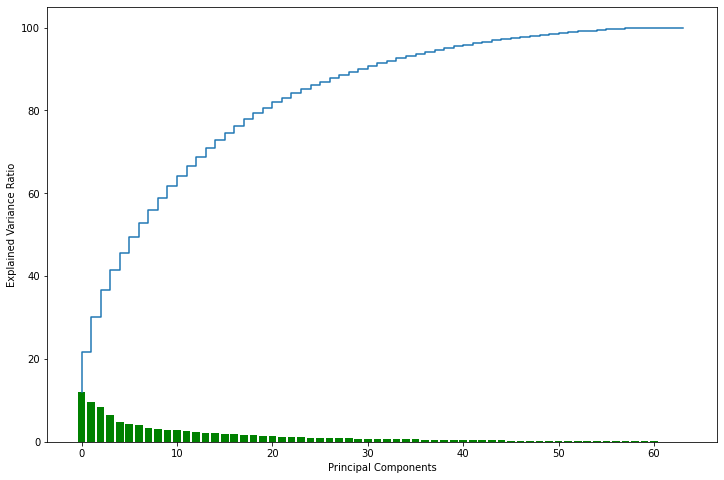

In [145]:
plt.figure(figsize = (12,8))
plt.bar(range(len(cum_sum_exp)),var_exp, align = 'center', label = "Explained Variance", color = 'green')
plt.step(range(len(cum_sum_exp)), cum_sum_exp, label = 'Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


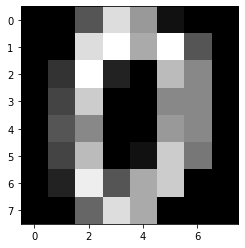

In [74]:
plt.imshow(digits.images[0], cmap = plt.cm.gray)

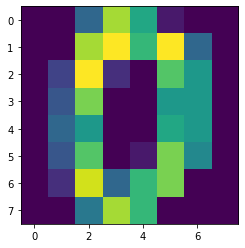

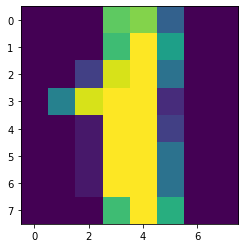

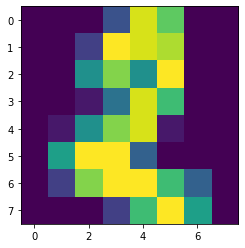

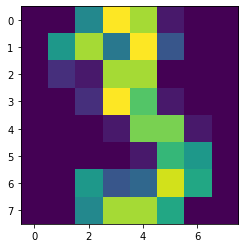

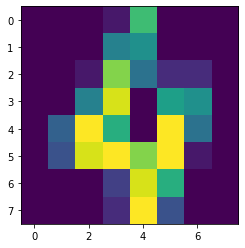

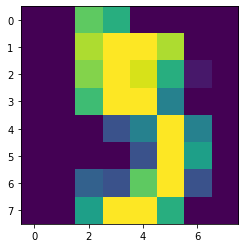

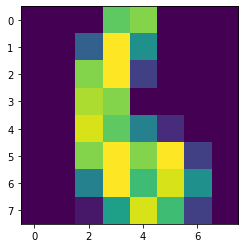

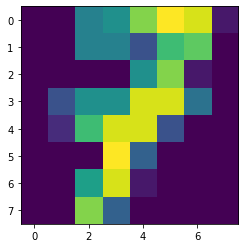

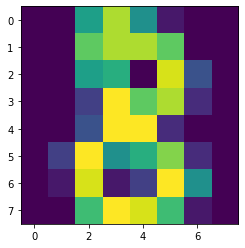

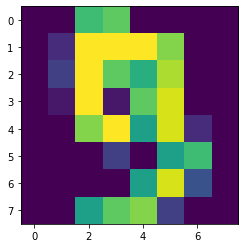

In [79]:
for i in range(10):
    plt.imshow(digits.images[i])
    plt.show()

## Model Building with 30 PCs

In [81]:
from sklearn.model_selection import train_test_split
y = digits.target



In [96]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2, random_state = 0)
pca = PCA(n_components = 30)
pca_xtrain = pca.fit_transform(x_train)
pca_xtest = pca.transform(x_test)

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
model = DecisionTreeClassifier()
model.fit(pca_xtrain, y_train)

DecisionTreeClassifier()

In [98]:
y_pred = model.predict(pca_xtest)

In [93]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [99]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8361111111111111
[[25  0  0  0  0  1  0  0  0  1]
 [ 0 27  0  0  0  1  2  1  3  1]
 [ 0  1 32  0  0  0  1  1  0  1]
 [ 0  0  2 21  0  1  1  0  1  3]
 [ 0  0  0  0 26  0  0  2  1  1]
 [ 0  1  1  0  0 33  0  0  2  3]
 [ 0  2  1  0  0  0 40  0  1  0]
 [ 2  2  1  0  1  1  0 30  0  2]
 [ 0  1  0  1  0  0  4  0 33  0]
 [ 3  0  2  1  0  1  0  0  0 34]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.79      0.77      0.78        35
           2       0.82      0.89      0.85        36
           3       0.91      0.72      0.81        29
           4       0.96      0.87      0.91        30
           5       0.87      0.82      0.85        40
           6       0.83      0.91      0.87        44
           7       0.88      0.77      0.82        39
           8       0.80      0.85      0.83        39
           9       0.74      0.83      0.78        41

    accuracy                           0.84       360


## model with 40 features

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2, random_state = 1)
pca = PCA(n_components = 40)
pca_xtrain = pca.fit_transform(x_train)
pca_xtest = pca.transform(x_test)

In [110]:
model2 = DecisionTreeClassifier()
model2.fit(pca_xtrain, y_train)

DecisionTreeClassifier()

In [111]:
y_pred2 = model2.predict(pca_xtest)

In [112]:
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

0.8194444444444444
[[41  0  0  1  0  0  0  0  0  1]
 [ 0 30  0  1  3  0  0  0  1  0]
 [ 0  0 26  5  0  3  1  1  0  0]
 [ 0  1  2 30  0  2  0  0  3  3]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 1  0  0  0  0 24  3  0  2  0]
 [ 1  0  0  0  0  1 35  0  0  0]
 [ 0  1  2  0  1  1  0 28  2  2]
 [ 0  1  1  1  0  5  0  1 20  0]
 [ 1  0  0  2  2  3  2  0  0 24]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.91      0.86      0.88        35
           2       0.84      0.72      0.78        36
           3       0.75      0.73      0.74        41
           4       0.86      0.97      0.91        38
           5       0.62      0.80      0.70        30
           6       0.85      0.95      0.90        37
           7       0.90      0.76      0.82        37
           8       0.71      0.69      0.70        29
           9       0.80      0.71      0.75        34

    accuracy                           0.82       360


In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2, random_state = 2)
pca = PCA(n_components = 40)
pca_xtrain = pca.fit_transform(x_train)
pca_xtest = pca.transform(x_test)
model3 = RandomForestClassifier()
model3.fit(pca_xtrain, y_train)

RandomForestClassifier()

In [126]:
y_pred3 = model3.predict(pca_xtest)

In [127]:
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

0.9388888888888889
[[32  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  1  0]
 [ 0  1 30  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  4  0  0  1  0]
 [ 0  0  0  0 30  0  0  1  3  1]
 [ 0  0  0  0  1 41  0  0  0  1]
 [ 0  0  0  0  0  0 33  1  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0 34  1]
 [ 0  0  0  0  0  1  1  1  1 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.96      0.98      0.97        44
           2       1.00      0.97      0.98        31
           3       1.00      0.86      0.93        36
           4       0.97      0.86      0.91        35
           5       0.89      0.95      0.92        43
           6       0.97      0.94      0.96        35
           7       0.93      1.00      0.96        40
           8       0.83      0.94      0.88        36
           9       0.89      0.86      0.87        28

    accuracy                           0.94       360


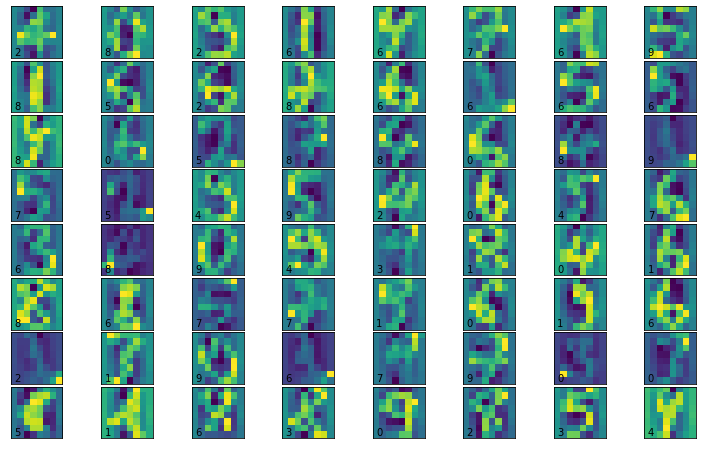

In [139]:
# Analysis of mismatched data for pc = 30

fig = plt.figure(figsize = (10,6))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

for i in range(64):
    ax = fig.add_subplot(8,8, i+1, xticks = [], yticks = [])
    ax.imshow(x_test.reshape(-1, 8, 8)[i], interpolation = 'nearest')
    
    if y_pred[i] ==y_test[i]:
        ax.text(0,7,str(y_pred[i]))
    else:
        ax.text(0,7,str(y_pred[i]))
        
